In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [10]:
topic_0 = np.array([100,100,100,0,0,0,0,0,0])
topic_1 = np.array([100,0,0,100,0,0,100,0,0])
topic_2 = np.array([0,0,100,0,0,100,0,0,100])
topic_3 = np.array([0,100,0,0,100,0,0,100,0])
topic_4 = np.array([100,0,0,0,100,0,0,0,100])
topic_5 = np.array([100,100,100,0,0,100,0,0,100])

In [12]:
topic_1.reshape(5,5)

array([[100,   0,   0,   0,   0],
       [100,   0,   0,   0,   0],
       [100,   0,   0,   0,   0],
       [100,   0,   0,   0,   0],
       [100,   0,   0,   0,   0]])

In [228]:
t0_dist = topic_0.reshape(1,-1) / np.sum(topic_0)
t1_dist = topic_1.reshape(1,-1) / np.sum(topic_1)
t2_dist = topic_2.reshape(1,-1) / np.sum(topic_2)
t3_dist = topic_3.reshape(1,-1) / np.sum(topic_3)
t4_dist = topic_4.reshape(1,-1) / np.sum(topic_4)
t5_dist = topic_5.reshape(1,-1) / np.sum(topic_5)

In [509]:
tdists = [t0_dist, t1_dist, t2_dist, t3_dist, t4_dist, t5_dist]
tdists = [np.squeeze(item) for item in tdists]
num_topics = len(tdists)

In [530]:
num_images = 500
num_words = 25
dim = 3

<Figure size 640x480 with 0 Axes>

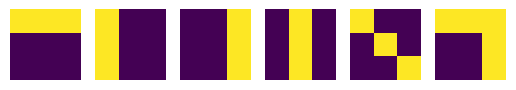

In [531]:
plt.figure()

fig, axes = plt.subplots(1,len(tdists))
for i, t in enumerate(tdists):
    axes[i].imshow(tdists[i].reshape(dim, dim))
    axes[i].axis('off')

In [532]:
w_corp = []
z_corp = []

for iter in range(num_images):
    dir_draw = np.random.dirichlet([1] * num_topics, 1)[0]
    mult_draw = np.random.multinomial(num_words, pvals = dir_draw)
    w_i = np.zeros(num_words)
    z_i = np.zeros(num_words)
    i = 0
    for t, count in enumerate(mult_draw):
        words = np.random.choice(dim * dim, size=count, p=tdists[t])
        for j, word in enumerate(words):
            w_i[i] = words[j]
            z_i[i] = t
            i += 1 
    w_i, z_i = shuffle(w_i, z_i, random_state=0)
    w_corp.append(w_i)
    z_corp.append(z_i)
w_corp = np.array(w_corp)
z_corp = np.array(z_corp)

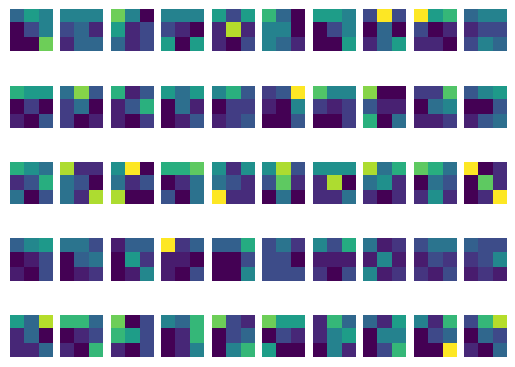

In [533]:
rows = 5
cols = 10

indices = np.random.choice(w_corp.shape[0], rows * cols, replace=False)

indices = indices.reshape(rows, cols)

fig, axes = plt.subplots(rows, cols)

for i, row in enumerate(indices):
    images = w_corp[row]
    maxfreq = 0
    for j, image in enumerate(images):
        unique, counts = np.unique(image, return_counts=True)
        maxfreq = max(maxfreq, max(counts))
    for j, image in enumerate(images):
        unique, counts = np.unique(image, return_counts=True)
        freqs = np.zeros(dim * dim)
        for num, ct in zip(unique, counts):
            freqs[int(num)] = ct
        axes[i,j].imshow(freqs.reshape(dim, dim), vmin=0, vmax=maxfreq)
        axes[i,j].axis("off")

In [534]:
topic_assignments = np.random.randint(0,num_topics,size=num_images * num_words)
len(topic_assignments)

12500

In [535]:
topic_assignments = topic_assignments.reshape(num_images, num_words)

In [536]:
beta = 1
alpha = 1

In [537]:
topic_assignments

array([[3, 3, 4, ..., 0, 4, 5],
       [4, 0, 3, ..., 3, 1, 1],
       [0, 4, 3, ..., 3, 5, 4],
       ...,
       [0, 5, 3, ..., 0, 4, 0],
       [2, 5, 1, ..., 3, 3, 5],
       [1, 4, 2, ..., 3, 4, 4]])

In [538]:
document_data = np.zeros((num_images, num_topics))
word_data = np.zeros((dim * dim, num_topics))

In [539]:
document_data

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [540]:
word_data

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [541]:
for d in range(num_images):
    for w in range(num_words):
        document_data[d, topic_assignments[d,w]] += 1
        word_data[int(w_corp[d,w]), topic_assignments[d,w]] += 1
        # print(w_corp[d,w])
        # word_data[w_corp[d,w], 1] += 1
        # word_data[1, topic_assignments[d,w]] += 1

In [542]:
topic_assignments

array([[3, 3, 4, ..., 0, 4, 5],
       [4, 0, 3, ..., 3, 1, 1],
       [0, 4, 3, ..., 3, 5, 4],
       ...,
       [0, 5, 3, ..., 0, 4, 0],
       [2, 5, 1, ..., 3, 3, 5],
       [1, 4, 2, ..., 3, 4, 4]])

In [543]:
w_corp

array([[1., 1., 7., ..., 0., 1., 8.],
       [2., 1., 1., ..., 8., 6., 0.],
       [3., 6., 2., ..., 5., 4., 7.],
       ...,
       [2., 0., 7., ..., 0., 5., 3.],
       [0., 0., 2., ..., 8., 8., 4.],
       [3., 1., 8., ..., 8., 1., 8.]])

In [544]:
def new_draw_fcd(state, ind):
    d = math.floor(ind / num_words)
    w_ind = ind - d * num_words
    word = int(w_corp[d, w_ind])
    topic = state[d, w_ind]
    # print(f'topic: {z_corp[d, w_ind]}')
    # print(f'word: {word}')

    doc_topic = document_data[d].copy()
    doc_topic[topic] -= 1
    nddot = np.sum(doc_topic)
    doc_topic_dist = (doc_topic + alpha) / (nddot + num_topics * alpha)
    # print(doc_topic_dist)

    topic_word = word_data[word].copy()
    # print(f'pre {topic_word}')
    topic_word[topic] -= 1
    # print(topic)

    njdot = np.sum(document_data, axis=0)
    # njdot[topic] -= 1
    # print(njdot)
    # print(f'post{topic_word}')
    topic_word_dist = (topic_word + beta) / (njdot + dim * dim * beta)
    # print(topic_word_dist)

    fcd = doc_topic_dist * topic_word_dist

    fcd_rescale = fcd / np.sum(fcd)
    # print(fcd_rescale)
    return np.random.choice(num_topics, 1, p=fcd_rescale)[0]
    
    # print(topic_word)


In [545]:
new_draw_fcd(topic_assignments, 6)
# draw_fcd(w_corp, z_corp, 4)

4

In [551]:
%lprun -f new_draw_fcd new_draw_fcd(topic_assignments, 1000)

Timer unit: 1e-09 s

Total time: 0.00131488 s
File: /tmp/ipykernel_39014/206674183.py
Function: new_draw_fcd at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def new_draw_fcd(state, ind):
     2         1       2870.0   2870.0      0.2      d = math.floor(ind / num_words)
     3         1        877.0    877.0      0.1      w_ind = ind - d * num_words
     4         1       6506.0   6506.0      0.5      word = int(w_corp[d, w_ind])
     5         1       1054.0   1054.0      0.1      topic = state[d, w_ind]
     6                                               # print(f'topic: {z_corp[d, w_ind]}')
     7                                               # print(f'word: {word}')
     8                                           
     9         1      14596.0  14596.0      1.1      doc_topic = document_data[d].copy()
    10         1       5081.0   5081.0      0.4      doc_topic[topic] -= 1
    11         1      63060.0 

In [546]:

def gibbs_iter(w_corp, state, burn_in=False):
    # next_state = state.copy()
    for i in range(num_words * num_images):
        d = math.floor(i / num_words)
        w_ind = i - d * num_words
        old_topic = state[d,w_ind].copy()
        new_state_i = new_draw_fcd(state, i)
        word = int(w_corp[d,w_ind])
        state[d,w_ind] = new_state_i
        
        # print(f'word {word} old state {old_topic} new state {new_state_i}')

        # print(document_data)
        # print(word_data)

        # update data structure
        document_data[d, old_topic] -=1
        document_data[d, new_state_i] +=1

        word_data[word, old_topic] -=1
        word_data[word, new_state_i] += 1
        # print(document_data)
        # print(word_data)

    return state.reshape(num_images, num_words)

In [547]:
state = topic_assignments
for i in range(1000):
    if i % 100 == 0:
        print(i)
    state = gibbs_iter(w_corp, topic_assignments)

0
100
200
300
400
500
600
700
800
900


In [224]:
def draw_fcd(words, topic_assigns, ind):
    d = math.floor(ind / num_words)
    w_ind = ind - d * num_words
    word = int(w_corp[d, w_ind])
    print(f'topic: {z_corp[d, w_ind]} word: {word}')
    # print(f'word: {word}')
    curr_topic_assign = int(z_corp[d, w_ind])
    tprob_unweighted = np.zeros(num_topics)
    partial_w = np.delete(words.reshape(1,-1), ind)
    partial_z = np.delete(topic_assigns.reshape(1,-1), ind)
    for t in range(num_topics):
        #njdot and njw
        words_in_topic = partial_w[partial_z == t]
        njdot = len(words_in_topic)
        unique, counts = np.unique(words_in_topic, return_counts=True)
        ind_of_word = np.argwhere(unique == word)
        njw = 0
        if len(ind_of_word):
            ind_of_word = ind_of_word[0][0]
            count_of_word = counts[ind_of_word]
            njw = count_of_word

        # within document
        curr_doc_z = np.delete(topic_assigns[d], w_ind)
        njd = len(np.where(curr_doc_z == t)[0])
        nddot = num_words - 1


        print(f'njw: {njw} njdot: {njdot} njd: {njd} nddot: {nddot}')
        print(f'njdot {njdot + beta}')
        print(f'njw {njw + dim * dim * beta}')
        tprob_unweighted[t] = (njw + beta)*(njd + alpha) / ((njdot + dim * dim * beta)*(nddot + num_topics * alpha))
    # print(tprob_unweighted)
    tprob = tprob_unweighted / np.sum(tprob_unweighted)
    print(tprob_unweighted)
    return np.random.choice(num_topics, p=tprob)
        
    # print(word)

In [550]:
%load_ext line_profiler

In [86]:
def gibbs_iter(w_corp, state, burn_in=False):
    next_state = state.copy()
    # print(next_state)
    for i in range(num_words * num_images):
        new_state_i = draw_fcd(w_corp, next_state, i)
        d = math.floor(i / num_words)
        w_ind = i - d * num_words
        next_state[d,w_ind] = new_state_i
        # if not burn_in:
        #     topic_assignment_distrs[i, new_state_i] += 1
    return next_state.reshape(num_images, num_words)

In [147]:
%lprun -f gibbs_iter gibbs_iter(w_corp, topic_assignments)

Timer unit: 1e-09 s

Total time: 15.1167 s
File: /tmp/ipykernel_6637/92699743.py
Function: gibbs_iter at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def gibbs_iter(w_corp, state, burn_in=False):
     2         1    3033360.0    3e+06      0.0      next_state = np.zeros(num_images * num_words)
     3     20001    8323315.0    416.1      0.1      for i in range(0, len(next_state)):
     4     20000        2e+10 752545.7     99.6          new_state_i = draw_fcd(w_corp, state, i)
     5     20000   19534206.0    976.7      0.1          next_state[i] = new_state_i
     6     20000    5051857.0    252.6      0.0          if not burn_in:
     7     20000   29796306.0   1489.8      0.2              topic_assignment_distrs[i, new_state_i] += 1
     8         1       2603.0   2603.0      0.0      return next_state.reshape(num_images, num_words)

Burn in

In [87]:
state = topic_assignments
for i in range(1200):
    if i % 100 == 0:
        print(f'i: {i}')
    state = gibbs_iter(w_corp, state, burn_in=True)

i: 0
i: 100
i: 200
i: 300
i: 400
i: 500
i: 600
i: 700
i: 800
i: 900
i: 1000
i: 1100


In [548]:
def calc_phi(words, z_hat, t):
    tprobs = np.zeros(dim * dim)
    words_in_topic = words.reshape(1,-1)[z_hat.reshape(1,-1) == t]
    unique, counts = np.unique(words_in_topic, return_counts=True)
    # print(unique)
    # print(counts)
    njdot = np.sum(counts)
    # print(njdot)
    for word in range(dim * dim):
        numerator = beta
        denom = dim * dim * beta + njdot
        if word in unique:
            numerator += counts[np.where(unique == word)][0]
        tprobs[word] = numerator / denom
    return tprobs.reshape(dim, dim)
        

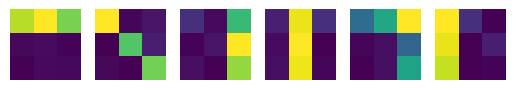

In [549]:
fig, ax = plt.subplots(1, num_topics)

for t in range(num_topics):
     ax[t].imshow(calc_phi(w_corp, state, t))
     ax[t].axis("off")